<a href="https://colab.research.google.com/github/SiddharthDNathan/PhishingURL-Detection-Model/blob/main/Phishing_URL_Classification_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Type of Problem - Supervised Learning Classification**

Why this problem?
Phishing attacks pose a significant threat to individuals, organizations, and even entire economies. Phishing URLs are designed to trick users into divulging sensitive information such as passwords, credit card numbers, or personal information by masquerading as legitimate websites. Detecting these malicious URLs accurately and efficiently is crucial for preventing users from falling victim to phishing scams.

Desired Outcome: The goal of the project is to develop a robust machine learning model capable of accurately identifying phishing URLs. This model should be able to analyze the characteristics of URLs and determine whether they are legitimate or malicious with a high degree of confidence. By accurately classifying phishing URLs, the model can help users and organizations mitigate the risks associated with phishing attacks, protect sensitive information, and enhance overall cybersecurity posture.

PS-**Detailed report at the End**

**DATA SOURCE**- https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset

In [ ]:
#Here begins the coding part

In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA LOADING AND PREPROCESSING**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV Files/Phishing_URL_Dataset.csv')

In [ ]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [ ]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [ ]:
df['label'].unique()

array([1, 0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [ ]:
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [ ]:
#There are no missing values in Data.

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows across all columns:")
print(duplicate_rows)

Duplicate rows across all columns:
Empty DataFrame
Columns: [FILENAME, URL, URLLength, Domain, DomainLength, IsDomainIP, TLD, URLSimilarityIndex, CharContinuationRate, TLDLegitimateProb, URLCharProb, TLDLength, NoOfSubDomain, HasObfuscation, NoOfObfuscatedChar, ObfuscationRatio, NoOfLettersInURL, LetterRatioInURL, NoOfDegitsInURL, DegitRatioInURL, NoOfEqualsInURL, NoOfQMarkInURL, NoOfAmpersandInURL, NoOfOtherSpecialCharsInURL, SpacialCharRatioInURL, IsHTTPS, LineOfCode, LargestLineLength, HasTitle, Title, DomainTitleMatchScore, URLTitleMatchScore, HasFavicon, Robots, IsResponsive, NoOfURLRedirect, NoOfSelfRedirect, HasDescription, NoOfPopup, NoOfiFrame, HasExternalFormSubmit, HasSocialNet, HasSubmitButton, HasHiddenFields, HasPasswordField, Bank, Pay, Crypto, HasCopyrightInfo, NoOfImage, NoOfCSS, NoOfJS, NoOfSelfRef, NoOfEmptyRef, NoOfExternalRef, label]
Index: []

[0 rows x 56 columns]


In [ ]:
#No duplicates were detected in Data across all columns

In [ ]:
#next step is to remove unnecessary features from the df i.e URL(as Tokenized columns for the same is present in our data frame), File Name and Title)

In [ ]:
df.drop(columns=['FILENAME', 'URL','Title'], inplace=True)

In [ ]:
#Now i will further tokenize the Domain column in 2 parts namely DomainName and isWWW to capture the complete essence of Domain feature when I use encoding technique in next step.

In [ ]:
def extract_domain_name(domain):
    parts = domain.split('.')
    is_www = 1 if 'www' in parts else 0
    if 'www' in parts:
        www_index = parts.index('www')
        if www_index < len(parts) - 1:
            return '.'.join(parts[www_index + 1 : -1]), is_www
    elif len(parts) > 2:
        return '.'.join(parts[-3:-1]), is_www
    elif len(parts) == 2:
        return parts[0], is_www
    else:
        return domain, is_www

df = df.assign(**{'DomainName': df['Domain'].apply(lambda x: extract_domain_name(x)[0]),
                  'isWWW': df['Domain'].apply(lambda x: extract_domain_name(x)[1])})

df = df[['DomainName', 'isWWW'] + [col for col in df.columns if col not in ['DomainName', 'isWWW']]]

In [ ]:
#Now we can drop Domain column without any issues.

In [ ]:
df.drop(columns = ['Domain'],inplace = True)

In [ ]:
#further i will rearrange the columns namely - isWWW, DomainName, TLD in respective order so that the underlying pattern is not missed from Domain column

In [ ]:
df = df[['isWWW','DomainName','TLD' , 'URLLength', 'DomainLength', 'IsDomainIP',
        'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb',
        'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation',
        'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
        'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
        'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
        'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS',
        'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
        'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
        'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
        'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
        'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
        'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
        'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']]

In [ ]:
#Now we can move to the next step i.e Encoding the categorical columns into numericals using Target Encoding

In [ ]:
df.describe()

,isWWW,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.748943,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,0.433622,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,0.000000,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,1.000000,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,1.000000,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [ ]:
te = ce.TargetEncoder()
df['DomainName'] = te.fit_transform(df['DomainName'], df['label'])
df['TLD'] = te.fit_transform(df['TLD'], df['label'])

**BASIC EXPLORATORY DATA ANALYSIS**

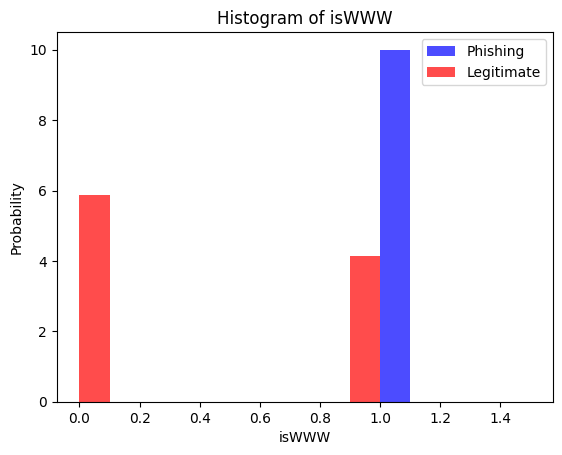

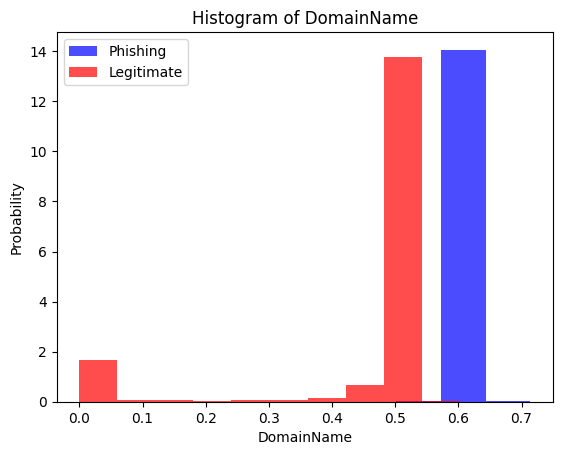

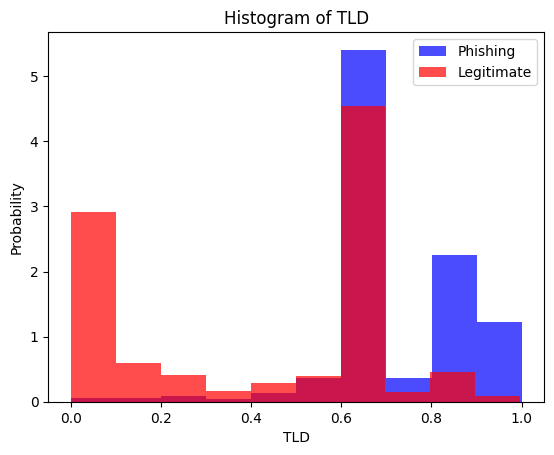

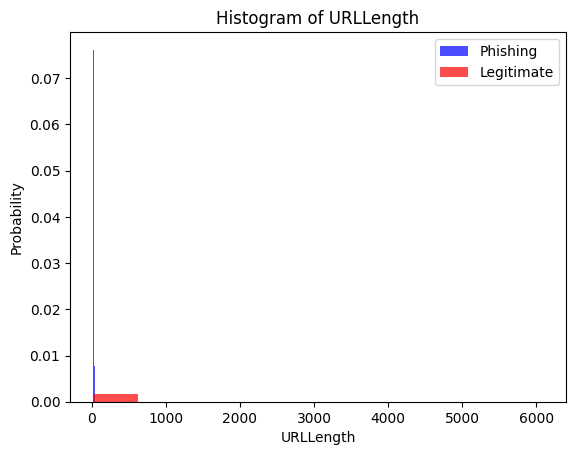

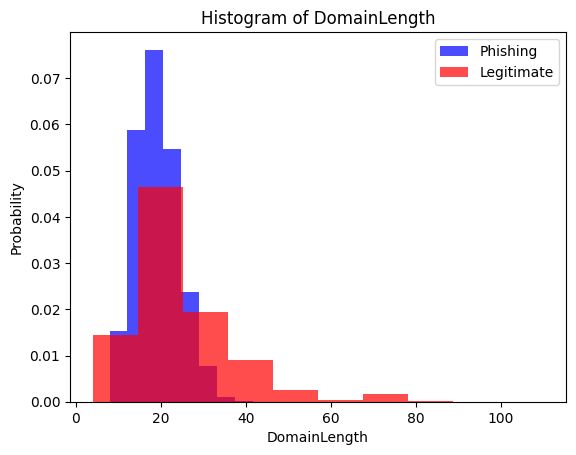

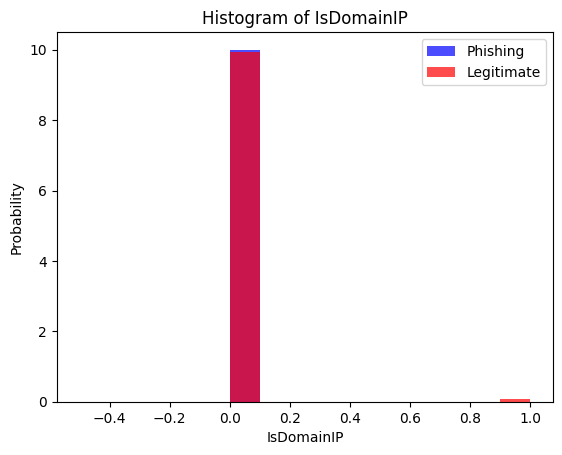

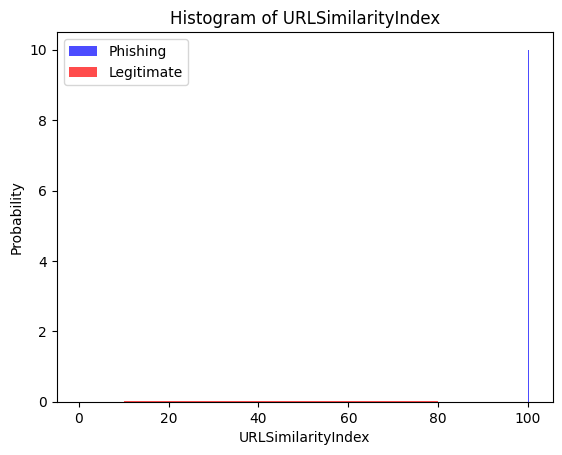

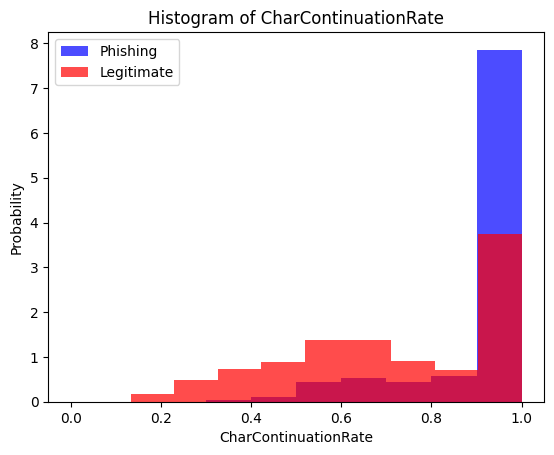

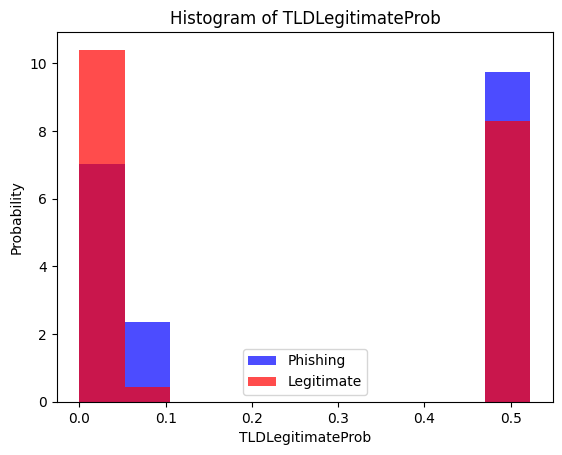

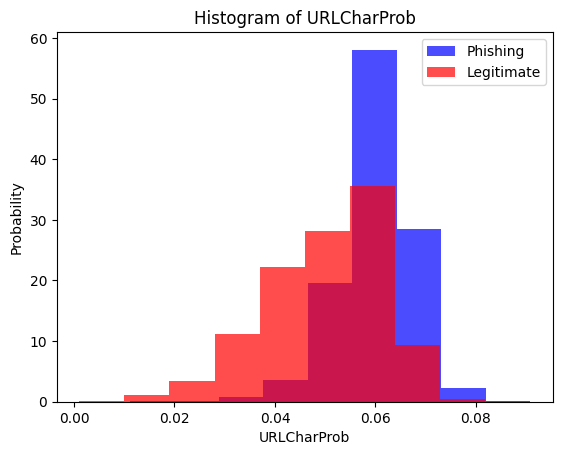

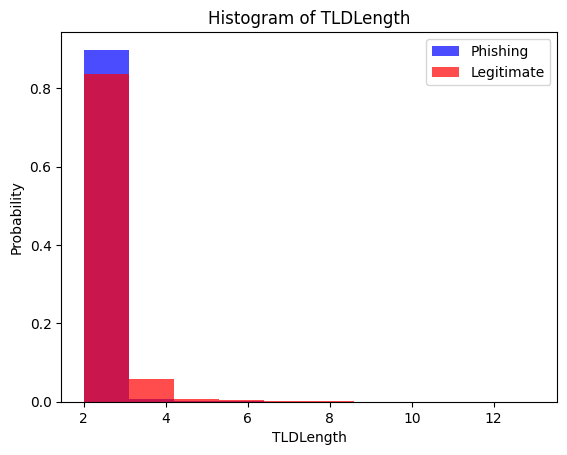

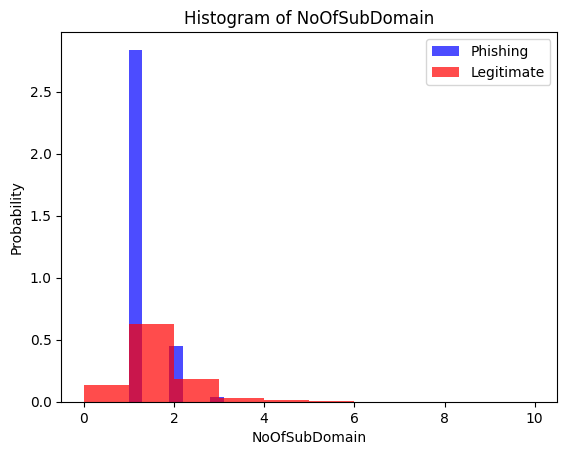

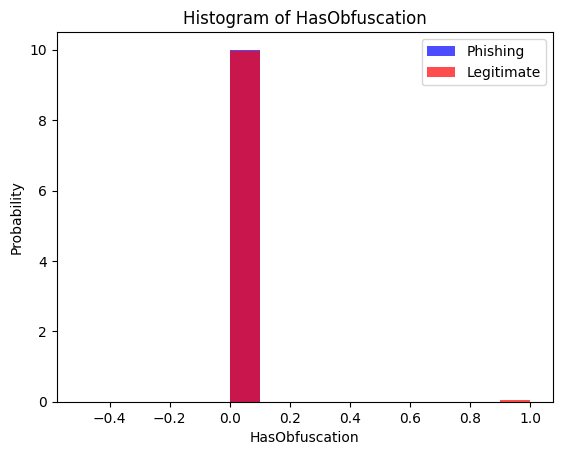

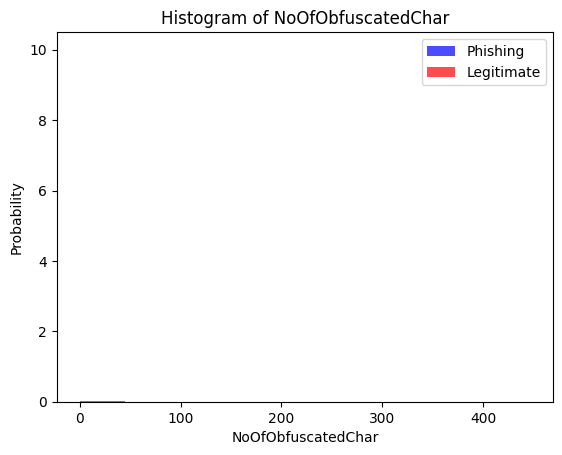

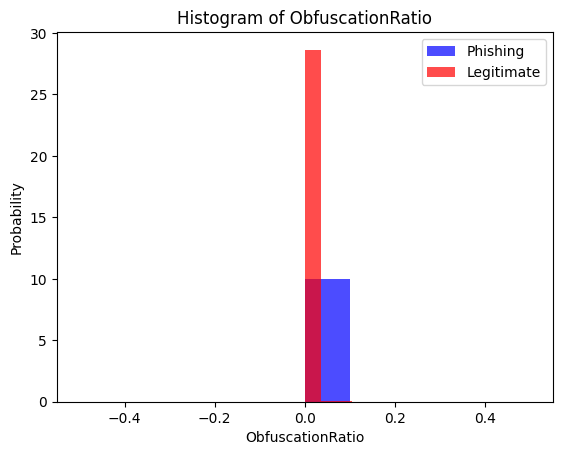

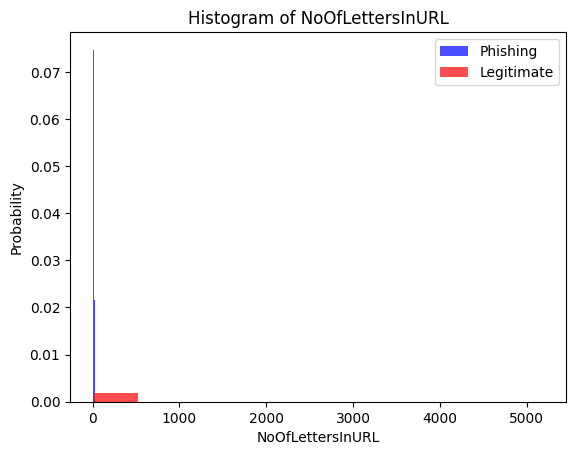

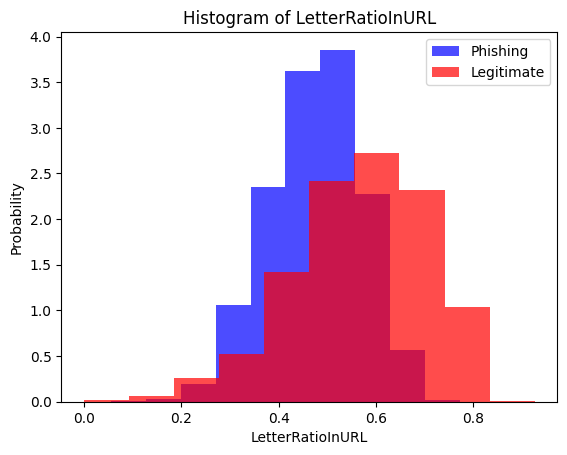

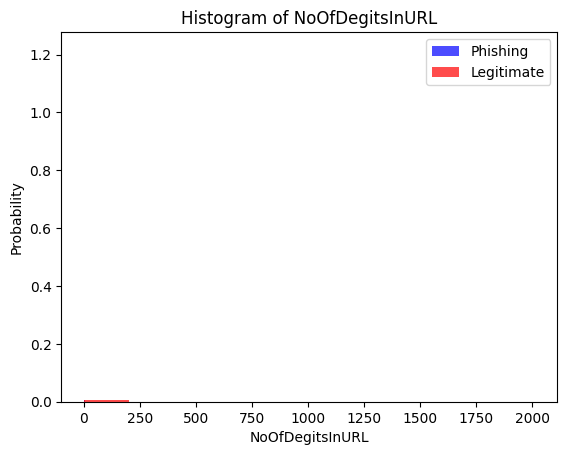

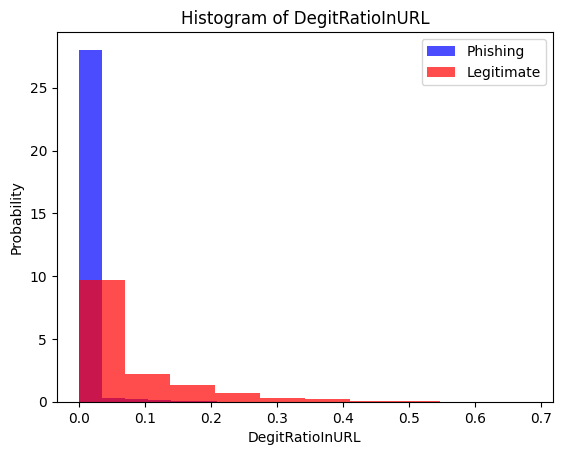

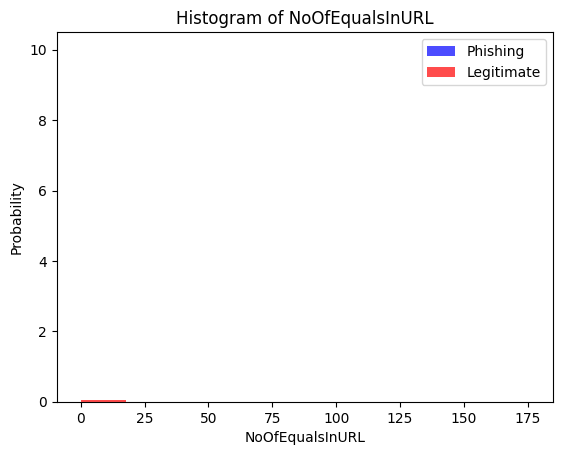

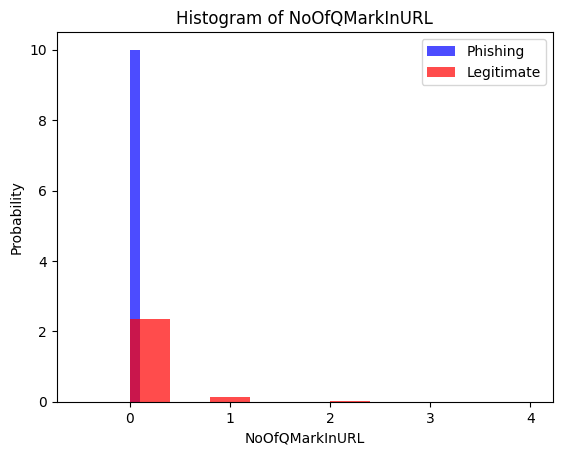

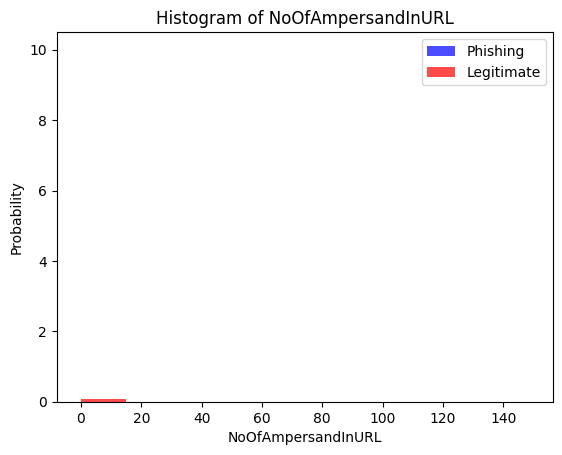

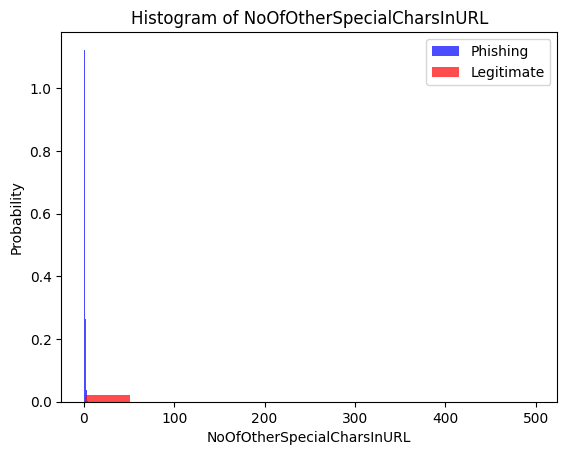

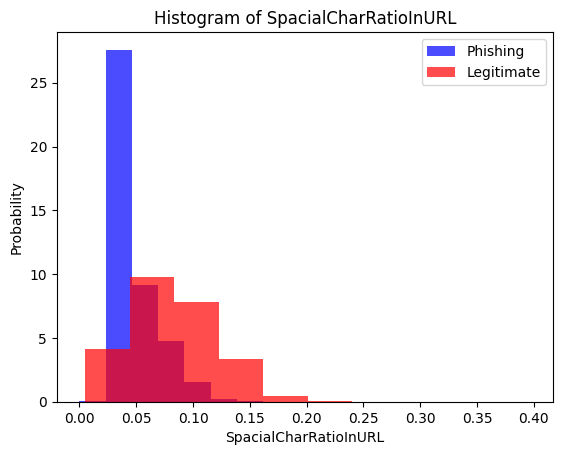

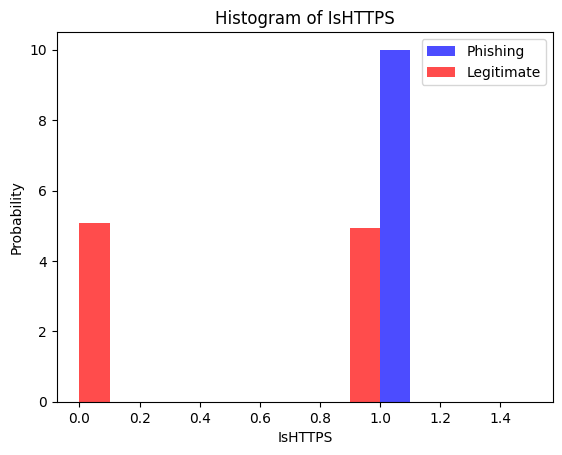

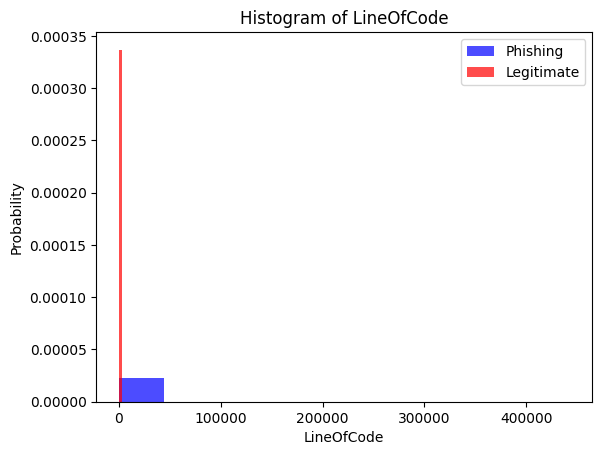

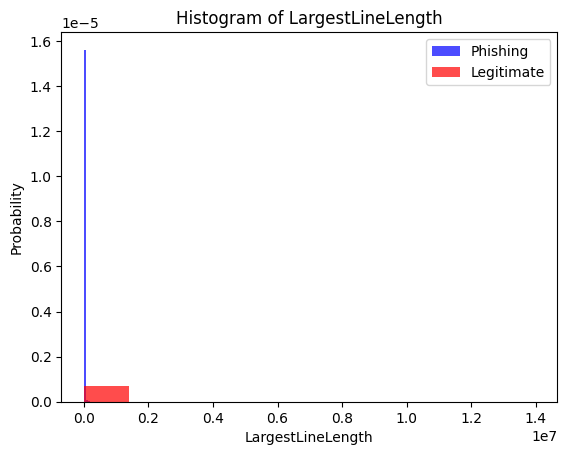

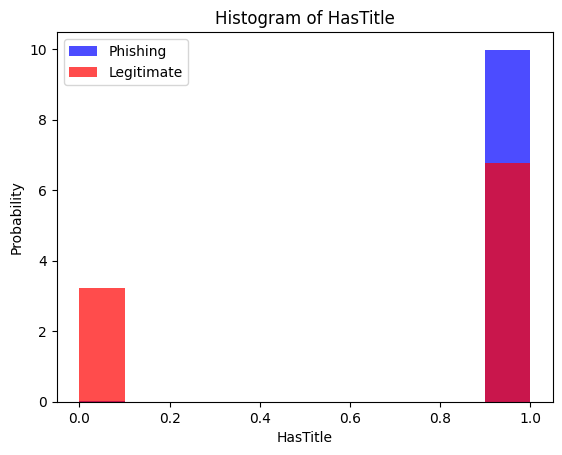

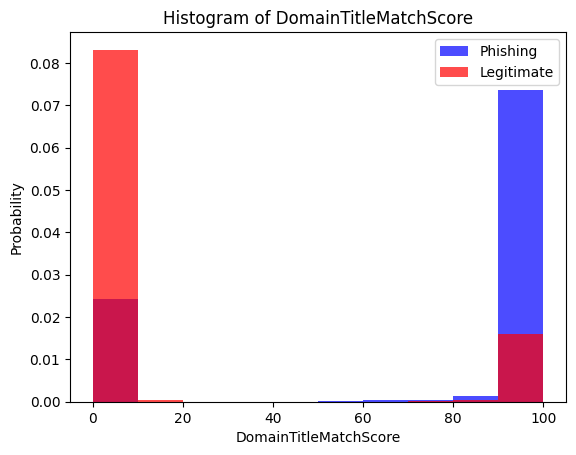

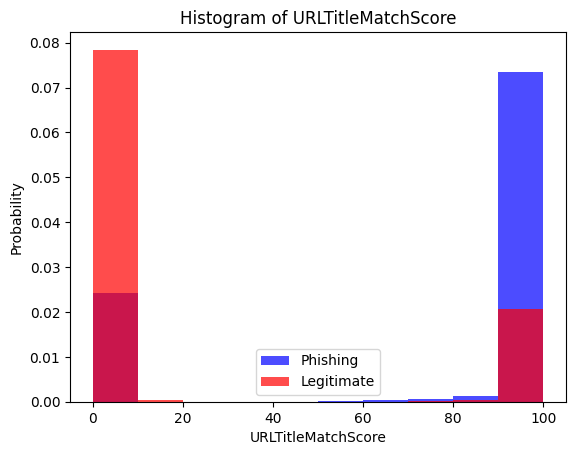

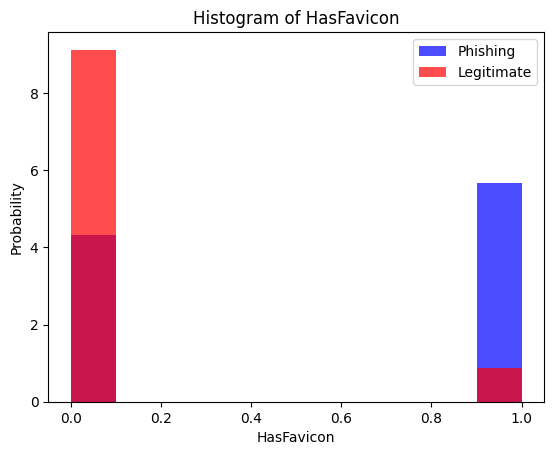

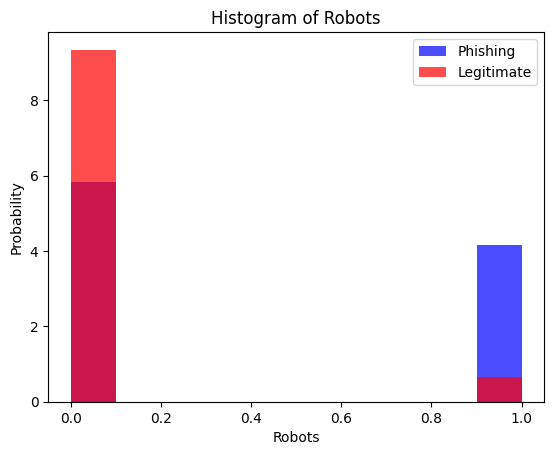

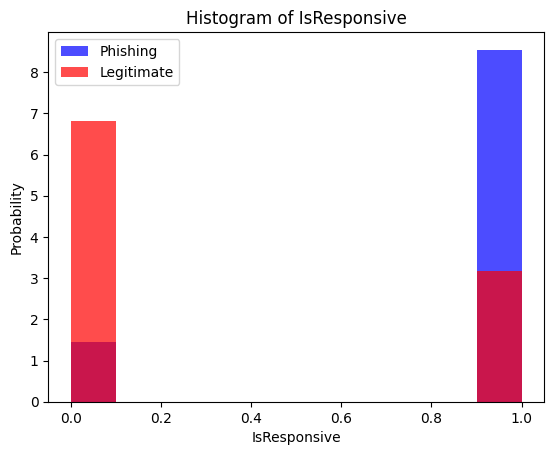

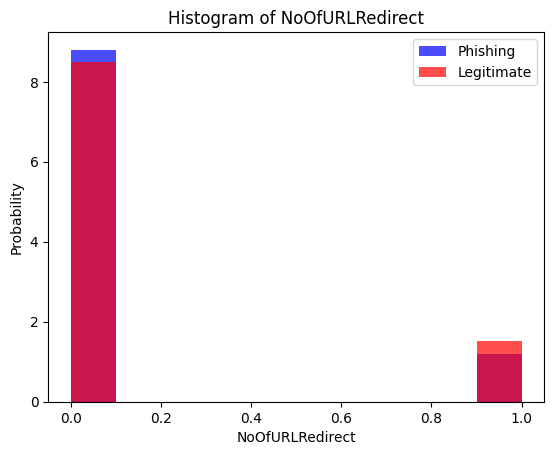

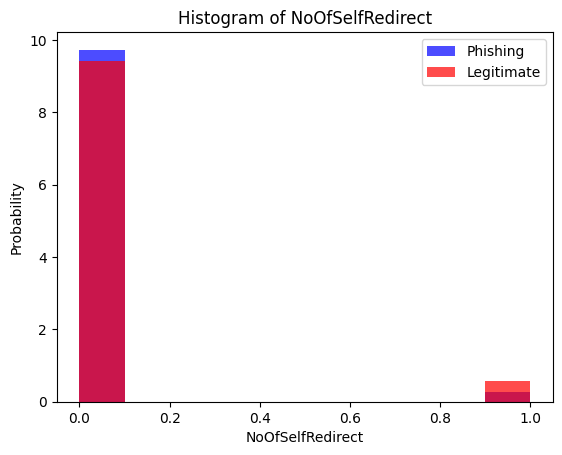

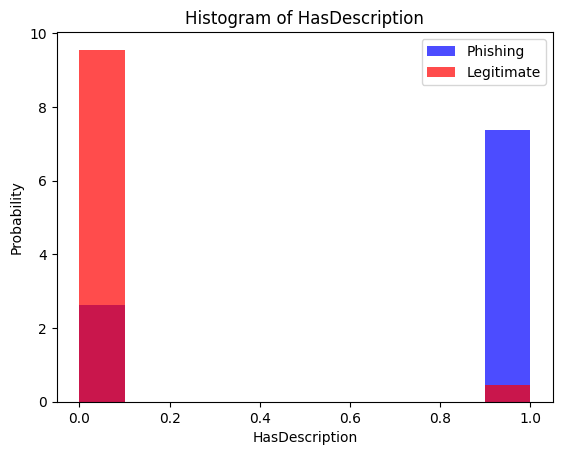

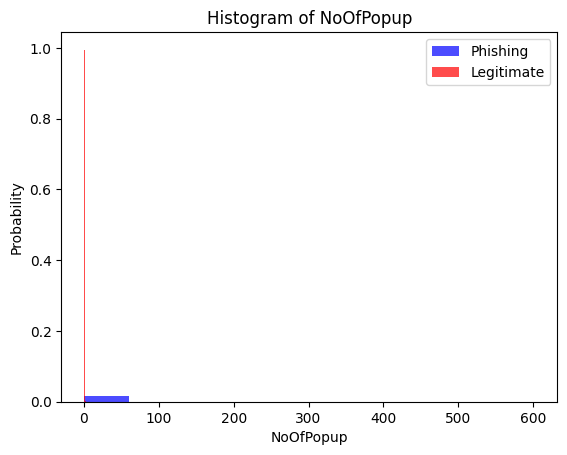

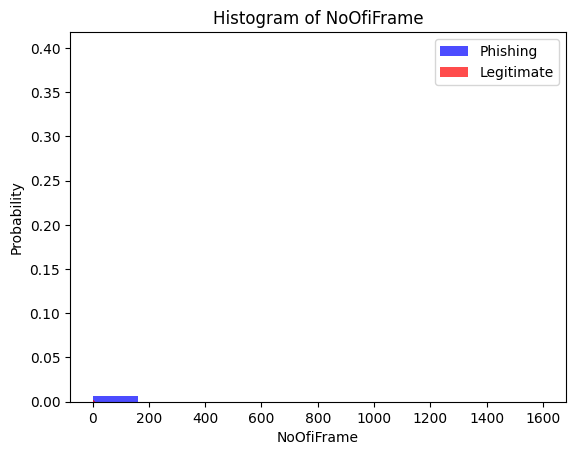

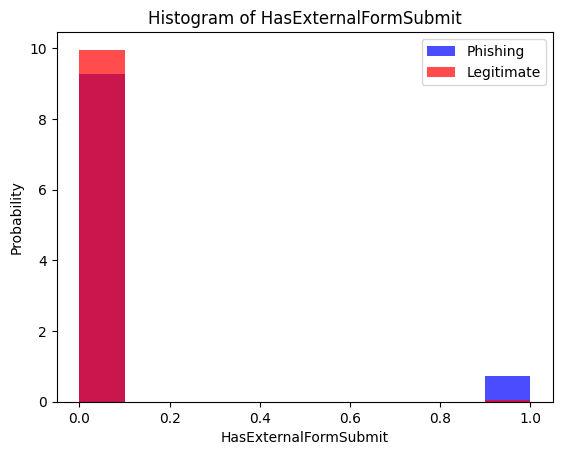

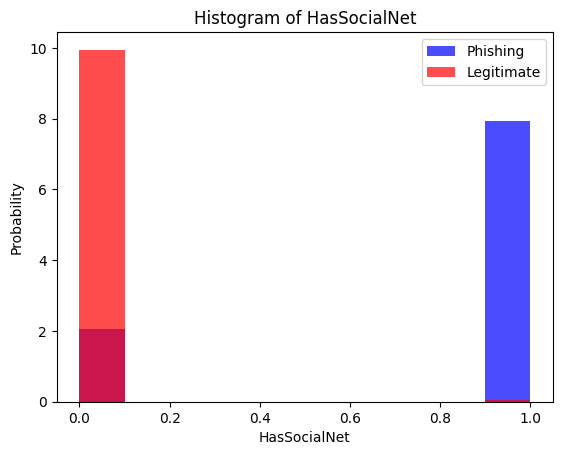

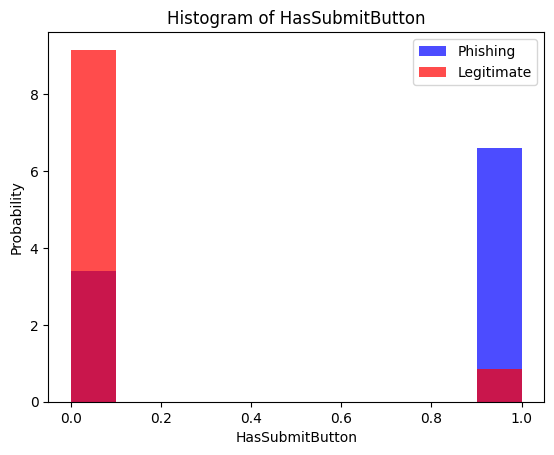

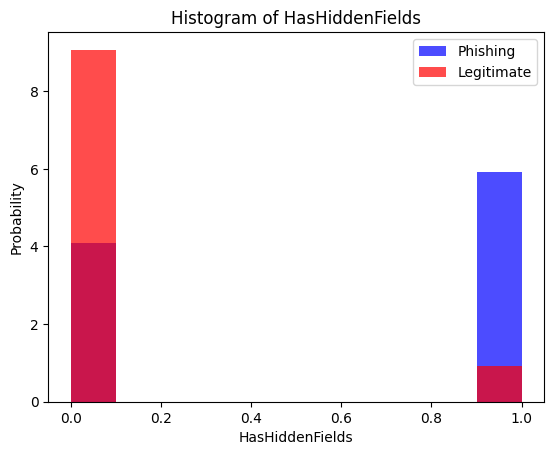

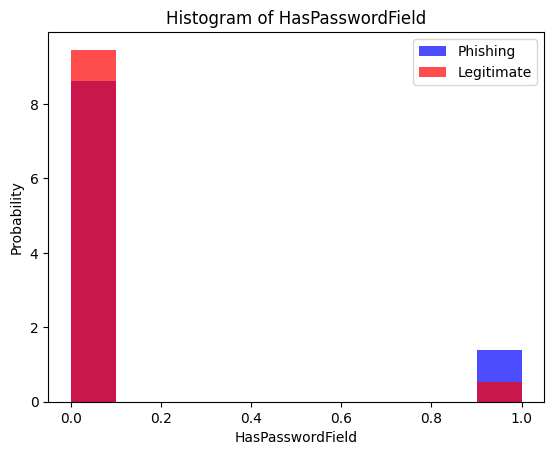

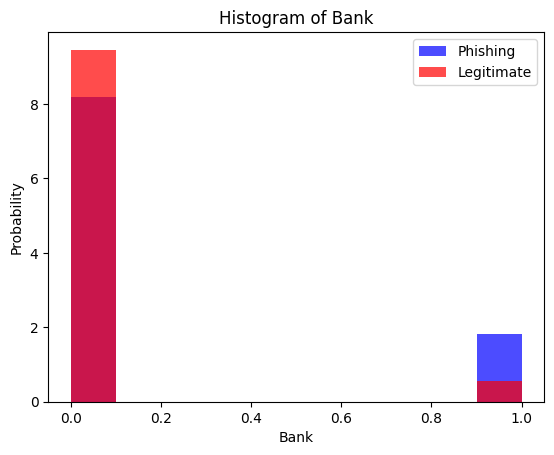

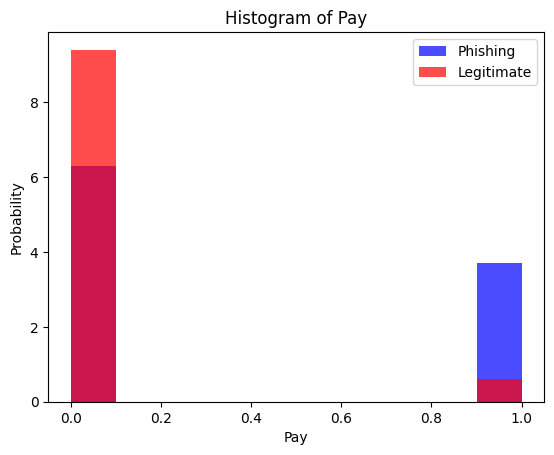

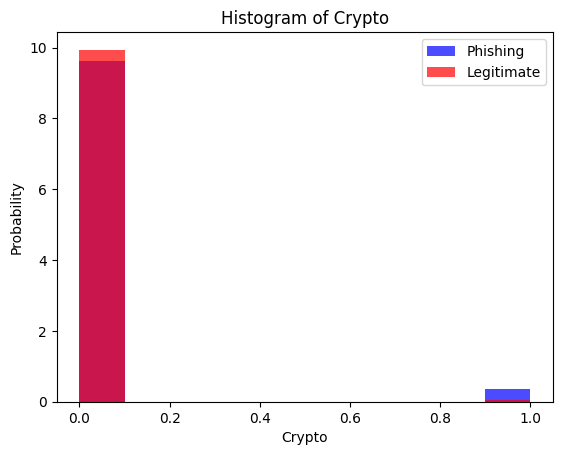

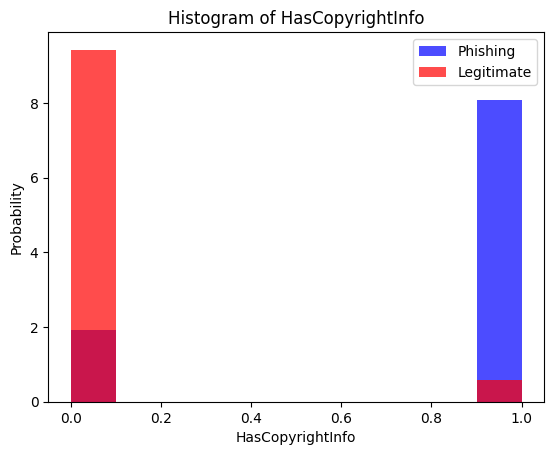

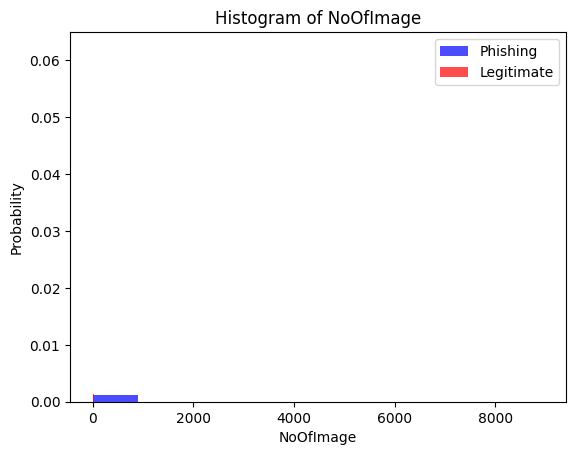

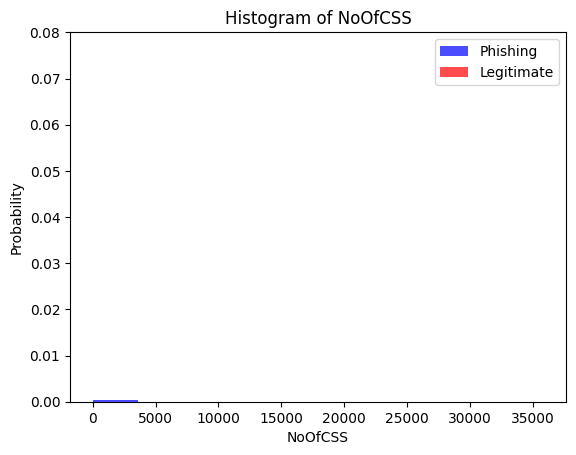

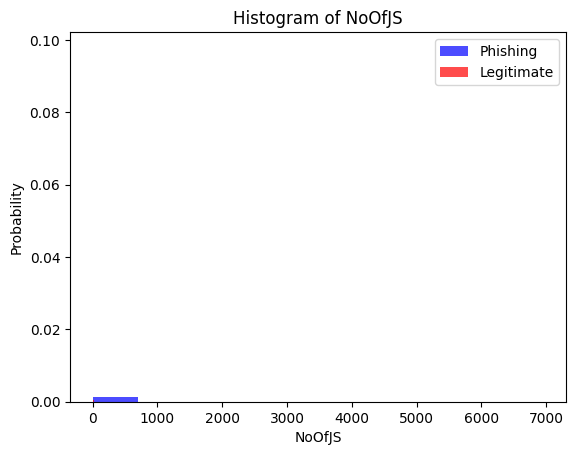

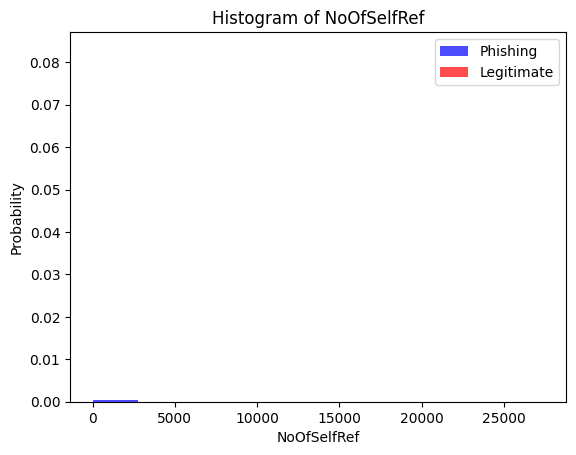

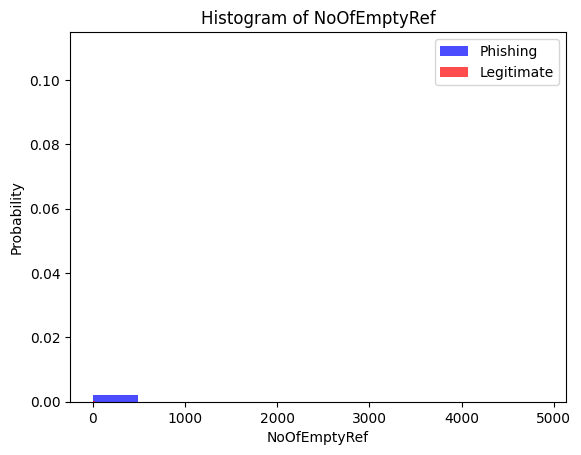

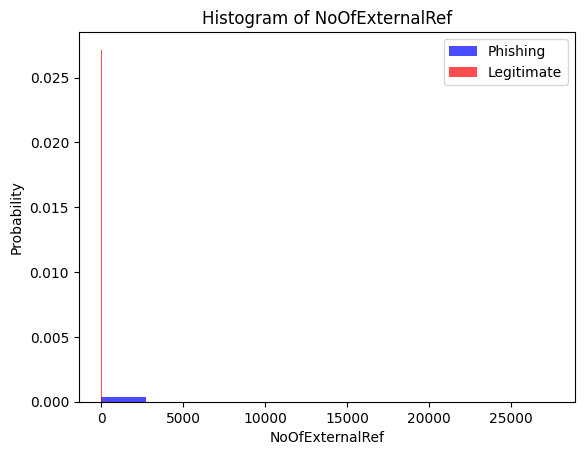

In [ ]:
cols = df.columns[:-1]

for label in cols:
    plt.hist(df[df['label'] == 1][label], color='blue', label='Phishing', alpha=0.7, density=True)
    plt.hist(df[df['label'] == 0][label], color='red', label='Legitimate', alpha=0.7, density=True)
    plt.title(f'Histogram of {label}')
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

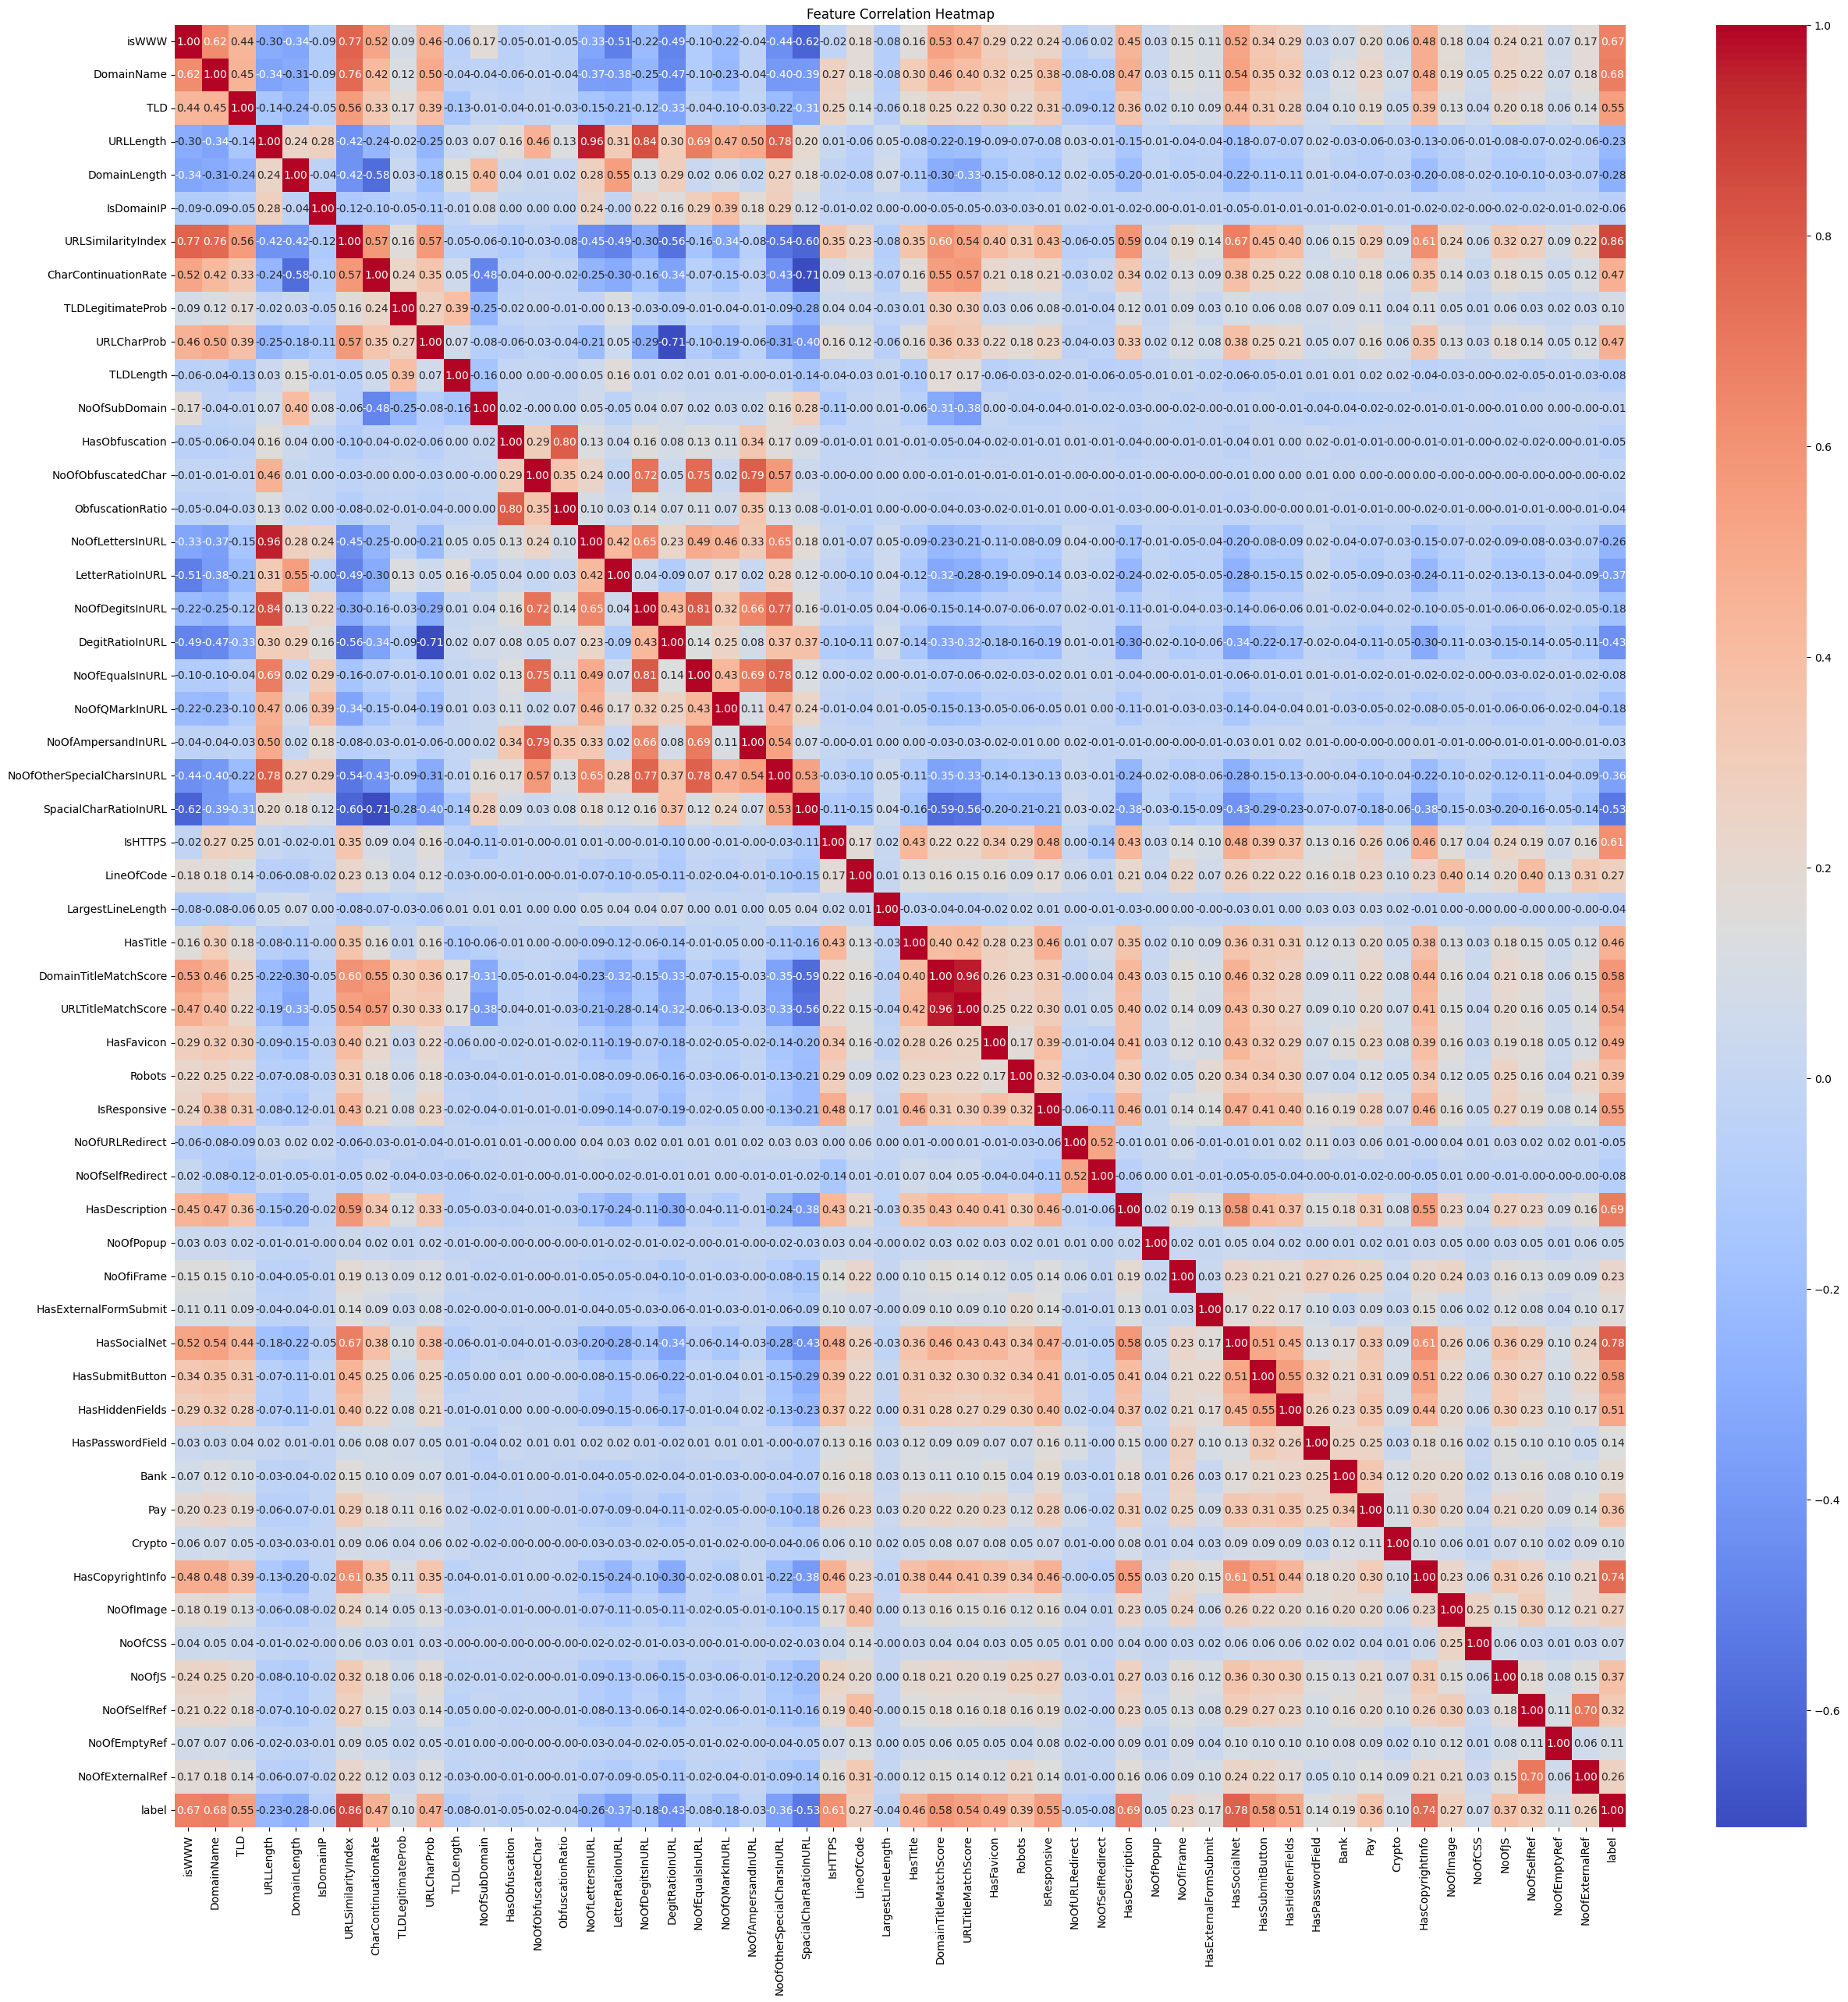

In [ ]:
# Feature Correlation Analysis
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


**Checking Taget variable distribution**

In [ ]:
df['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [ ]:
#as the data is balanced we dont need to use any resampling or over sampling techniques here.

**MODEL DEVELOPMENT AND  EVALUATION**

In [ ]:
#Feature and Target Splitting
X = df.drop('label', axis = 1)
y = df['label']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
model = LogisticRegression( penalty='l2')

# Initialize K-Fold cross-validator
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

# Calculate average score
avg_score = np.mean(cv_scores)

# Print scores
print("Cross-validation scores on training set:", cv_scores)
print("Average Score on training set:", avg_score)

# Now, evaluate the model on the separate test set
model.fit(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print("Test set accuracy:", test_score)


Cross-validation scores on training set: [0.99992048 0.99994699 0.99994699 0.99989398 0.99994699]
Average Score on training set: 0.9999310842606969
Test set accuracy: 0.999978795139846


In [ ]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [ ]:
train_preds = model.predict_proba(X_train_scaled)
test_preds = model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import log_loss
test_log_loss = log_loss(y_test,test_preds[:,1])
print("The log_loss score on test data is ", test_log_loss)

The log_loss score on test data is  0.00013108906059310183


In [ ]:
from sklearn.metrics import roc_auc_score
test_roc_auc_score = roc_auc_score(y_test,test_preds[:,1])
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  1.0


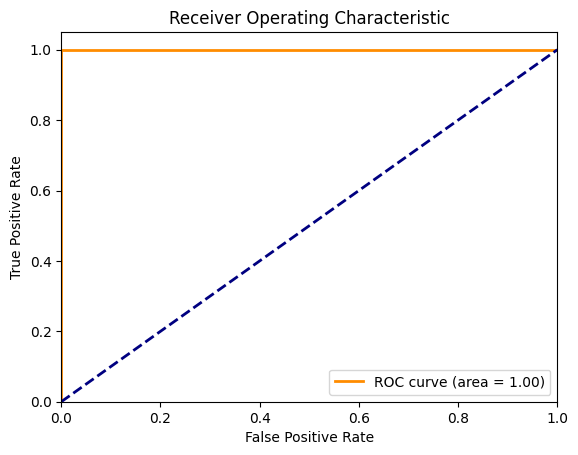

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, test_preds[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **Model Development and Evaluation with Validation Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(165056, 53)
(70739, 53)


In [ ]:
y_train.value_counts()

label
1    94262
0    70794
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

label
1    40588
0    30151
Name: count, dtype: int64

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
log_model = LogisticRegression(penalty ='l2')
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.9999858635264847


In [ ]:
from sklearn.metrics import precision_score
test_precision = precision_score(y_test,y_pred)
print("The precision on test data is ", test_precision)

The precision on test data is  0.99997536278302


In [ ]:
from sklearn.metrics import recall_score
test_recall = recall_score(y_test,y_pred)
print("The recall on test data is ", test_recall)

The recall on test data is  1.0


In [ ]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_test,y_pred)
print("The f1 score on test data is ", test_f1)

The f1 score on test data is  0.99998768123976


In [ ]:
train_preds = log_model.predict_proba(X_train_scaled)
test_preds = log_model.predict_proba(X_test_scaled)

In [ ]:
from sklearn.metrics import log_loss
test_log_loss = log_loss(y_test,test_preds[:,1])
print("The log_loss score on test data is ", test_log_loss)

The log_loss score on test data is  0.00014257537666117383


In [ ]:
from sklearn.metrics import roc_auc_score
test_roc_auc_score = roc_auc_score(y_test,test_preds[:,1])
print("The roc_auc_score on test data is ", test_roc_auc_score)

The roc_auc_score on test data is  1.0


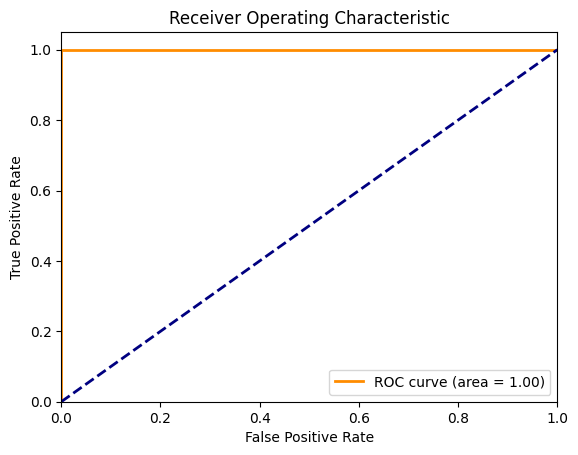

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, test_preds[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the model
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Model Accuracy:", decision_tree_accuracy)

# Print classification report
print(classification_report(y_test, y_pred_decision_tree))



Decision Tree Model Accuracy: 0.9999434541059388
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



In this project, we employed a variety of machine learning models to tackle the task of phishing URL classification. Specifically, we trained logistic regression, K-nearest neighbors (KNN), and decision tree models on our dataset. The models were evaluated both with and without validation techniques. Notably, even without the validation step, our logistic regression model achieved near-perfect accuracy. This observation suggests that our dataset is well-structured and our models are sufficiently robust to capture the underlying patterns in the data without overfitting. Additionally, we verified our findings by incorporating K-fold cross-validation, which further demonstrated consistent high performance across different folds. Despite the simplicity of our approach, the models exhibited exceptional accuracy, underscoring the effectiveness of the chosen features and the suitability of the selected algorithms for the task at hand.

**Phishing URL Classification Project Report**

**1. Introduction**

In this report, I present a simple and elegant approach to the problem of phishing URL classification. The aim of this project is to develop a machine learning model capable of accurately identifying phishing URLs while maintaining ease of understanding and follow-through. Phishing attacks are a significant cybersecurity threat, aimed at tricking users into divulging sensitive information by masquerading as legitimate websites. Detecting phishing URLs accurately is crucial for preventing users from falling victim to such attacks.

**2. Problem Statement**

The goal is to classify URLs as either legitimate or phishing based on their characteristics. This involves analyzing various features extracted from the URLs and building a predictive model that can distinguish between legitimate and phishing URLs with high accuracy.

**3. Data Source**

We obtained the dataset from the UCI Machine Learning Repository. The dataset contains various features extracted from URLs, including URL length, domain information, presence of obfuscation, and other characteristics.

**4. Data Preprocessing**

    1.Removed unnecessary columns such as FILENAME, URL, and Title.

    2.Tokenized the Domain column into DomainName and isWWW.

    3.Rearranged columns for better clarity.

    4.Encoded categorical variables using Target Encoding.

    5.Split the data into training and test sets.

    6.Standardized the features using StandardScaler.

**5. Model Development**

**5.1 Logistic Regression Model**

    1.Initialized a logistic regression model.

    2.Conducted k-fold cross-validation on the training set to evaluate the model's performance, ensuring robustness and avoiding overfitting.

    3.Evaluated the model's performance on the test set using various metrics including accuracy, precision, recall, f1-score, log loss, and ROC-AUC score.

**5.2 KNN Classifier**

    1.Trained and evaluated a KNN classifier as an alternative model.

    2.Compared the performance of both models using similar evaluation metrics.



**6. Results and Evaluation**

    1.The logistic regression model achieved high accuracy (>99%) on both the training and test sets.

    2.Other evaluation metrics such as precision, recall, and f1-score also indicated excellent performance.

    3.The model's ROC-AUC score was close to 1, indicating high discriminatory power.

    4.The KNN classifier also performed well but slightly lower than the logistic regression model.

**7. Conclusion**

    1.The developed logistic regression model demonstrates strong predictive performance in classifying phishing URLs.

    2.With high accuracy and robust evaluation metrics, the model shows promise in real-world applications for detecting phishing attacks.

    3.Further optimization and fine-tuning of the model could potentially enhance its performance even further.

**8. Future Work**

    1.Explore additional feature engineering techniques to improve model performance.

    2.Experiment with different machine learning algorithms and ensemble methods.

    3.Investigate techniques for handling imbalanced datasets, if applicable.

    4.Deploy the trained model in a production environment for real-time phishing URL detection.